<a href="https://colab.research.google.com/github/fpelogia/Optimization-and-Neural-Networks/blob/master/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de Redes Neurais
Aluno : Frederico José Ribeiro Pelogia

Orientador : Luis Felipe Cesar da Rocha Bueno

#Índice
1. [Função de ativação linear](https://colab.research.google.com/drive/1J5eLQuRxyFlVI_aRJ2-H_oYzRW_fRPVG)
    
2. [Função de ativação Sigmoide](https://colab.research.google.com/drive/1q7eV2O318LeqEvQZZRTfHYn3ErJ7nky4)

3. [Função de ativação $max(x,0)$](https://colab.research.google.com/drive/1s8oc1PofMhJAtYPFfffpTbCKcgehjmhW)
    
4. [Função de ativação $\frac{x + \sqrt{x^2 +0.0001} }{2}$](https://colab.research.google.com/drive/1c6m2lElZbDFNKq8f-ISMEQguB-cUDlp1)
    
 
 
5. [Método do Gradiente e Backpropagation](https://colab.research.google.com/drive/1XhmG4nNIG6wWobuuJN6l2yzx3y0ZmZXX)

6. [Utilizando Viés (Bias)](https://colab.research.google.com/drive/1xTZi2Bnf_4sdX_vqWSy3ArxHgj343IeK)

7. [Aumentando o número de camadas ocultas](https://colab.research.google.com/drive/1IyabWmbgWbK02Y1j-d33ggjG8VqGUcbm)

#APENAS TESTES DAQUI PRA BAIXO, IGNORAR

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

epsilon = 0.0001

def reLu(x):
    return 0.5*(x + np.sqrt(x**2 + epsilon))


def sigmoid(x):
    return 1/(1+np.exp(-1*x)) 

class Layer():
    def __init__(self, n_values, func = "none"):
        self.n_values = n_values
        self.func = func
        self.arr = np.random.randn(n_values)
        self.biases = np.random.randn(n_values)

    
class NeuralNetwork():
  
    def __init__(self, layers, learning_rate = 0.0005 ,optimizer = "backpropagation"):
        self.layers = layers
        self.n_layers = len(layers)
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        #inicializa as matrizes com os pesos
        for i in range(len(self.layers) - 1):
            n_curr = self.layers[i].n_values
            n_next = self.layers[i+1].n_values
            self.layers[i].weights = np.random.randn(n_curr,n_next)

    def train_step(self, input, target):

        self.layers[0].arr = input


        # Feed-Forward
        for i in range(self.n_layers):
            
            if i!= 0:
                self.layers[i].arr = np.dot(self.layers[i-1].arr, self.layers[i-1].weights)        
                self.layers[i].arr = np.add(self.layers[i].arr, self.layers[i].biases)
                
                if self.layers[i].func == "sigmoid":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = sigmoid(self.layers[i].arr[0][j]) 
                elif self.layers[i].func == "relu":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = reLu(self.layers[i].arr[0][j]) 
                else:
                    if not self.layers[i].func == "linear":
                        print("ERROR: unknown activation function {}".format(self.layers[i].func))

        output = self.layers[self.n_layers-1].arr

        # Otimização
   
        if self.optimizer == "backpropagation":

            for i in range(self.n_layers-1,0,-1):
                if i == self.n_layers-1:
                    error = target - output
                else:
                    error = np.dot(error, np.transpose(self.layers[i].weights))

                if self.layers[i].func == "linear":
                    d_func = 1
                elif self.layers[i].func == "sigmoid":
                    d_func = self.layers[i].arr*(1 - self.layers[i].arr)
                elif self.layers[i].func == "relu":
                    d_func = 0.5*(self.layers[i].arr/np.sqrt(self.layers[i].arr**2 + epsilon) + 1)
                else:
                    print("ERROR: unknown activation function {}".format(self.layers[self.n_layers - 1].func))

                gradient = self.learning_rate * error * d_func
                
                self.layers[i].biases = np.add(self.layers[i].biases, gradient)

                weights_deltas = np.dot(np.transpose(self.layers[i-1].arr), gradient)
                self.layers[i-1].weights = np.add(self.layers[i-1].weights, weights_deltas)

        # IMPLEMENTAR PARA MÉTODO DO GRADIENTE TBM
        elif self.optimizer == "gradient":
          

    def predict(self, input):

        self.layers[0].arr = input

        # Feed-Forward
        for i in range(len(self.layers)):
            if i!= 0:
                self.layers[i].arr = np.dot(self.layers[i-1].arr, self.layers[i-1].weights)        
                self.layers[i].arr = np.add(self.layers[i].arr, self.layers[i].biases)
                
                if self.layers[i].func == "sigmoid":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = sigmoid(self.layers[i].arr[0][j]) 
                elif self.layers[i].func == "relu":
                    for j in range(self.layers[i].n_values):
                        self.layers[i].arr[0][j] = reLu(self.layers[i].arr[0][j]) 
                else:
                    if not self.layers[i].func == "linear":
                        print("ERROR: unknown activation function {}".format(self.layers[i].func))

        output = self.layers[self.n_layers-1].arr
        return output
    
    
    def train(self, trainning_set, labels, epochs=1000):
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(trainning_set[index], labels[index])        




layers = [Layer(1), Layer(2,"relu"), Layer(2,"relu"),Layer(1,"linear")]

X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = X**2

mynn = NeuralNetwork(layers, 0.00005, optimizer= "backpropagation")
mynn.train(X, y, 10000)





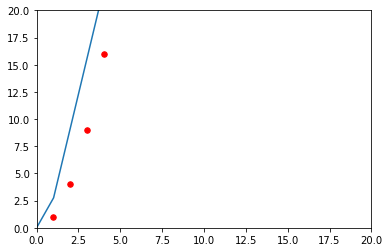

In [0]:
w1 = layers[0].weights[0][0]
w2 = layers[0].weights[0][1]

b1 = layers[1].biases[0][0]
b2 = layers[1].biases[0][1]

w3 = layers[1].weights[0][0]
w5 = layers[1].weights[1][0]

w4 = layers[1].weights[0][1]
w6 = layers[1].weights[1][1]

b3 = layers[2].biases[0][0]
b4 = layers[2].biases[0][1]

w7 = layers[2].weights[0][0]
w8 = layers[2].weights[1][0]
b5 = layers[3].biases[0][0]



#(w1w3w7 + w2w5w7 + w2w6w8 + w1w4w8)x 
#  + (w3w7b1 + w5w7b2 + w7b3 + w6w8b2 + w4w8b1 + w8b4 + b5)


A = -1*b1/w1
B = -1*b2/w2
C = -1*(w3*b1 + w5*b2 + b3)/(w3*w1 + w5*w2)
D = -1*(w6*b2 + w4*b1 + b4)/(w6*w2 + w4*w1)


ex = np.linspace(0,60,60)
ey = np.array(ex) 


for i in range(len(ey)):
  
  if (ey[i] < A and ey[i] >= B and ey[i] >= C and ey[i] >=D ):
    ey[i] = (w5*w2*w7 + w8*w2*w6)*ey[i] + b5
  
  elif (ey[i] < B and ey[i]>=A and ey[i]>=C and ey[i]>=D):
    ey[i] = (w7*w3*w1 + w8*w4*w1)*ey[i] + b5
  
  elif(ey[i] < A and ey[i] <B and ey[i]>=C and ey[i]>=D):
    ey[i] = b3*w7+b4*w8+b5
  
  elif(ey[i]<C and ey[i] <D and ey[i]>=A and ey[i]>=B):
    ey[i] = b5
  
  elif(ey[i]<A and ey[i]<B and ey[i]<C and ey[i]>=D):
    ey[i] = b4*w8+b5
    
  elif(ey[i]<A and ey[i]<B and ey[i]< D and ey[i]>=C):
    ey[i] = b3*w7+b5

  elif(ey[i]<A and ey[i]<C and ey[i]<D and ey[i]>=B):
    ey[i] = b5
  
  elif(ey[i]<B and ey[i]<C and ey[i]<D and ey[i]>=A):
    ey[i] = b5
  
  elif(ey[i]<C and ey[i]>=A and ey[i]>=B and ey[i]>=D):
    ey[i] = ((w2*ey[i] + b2)*w6 + (w1*ey[i] + b1)*w4 + b4)*w8 + b5
  
  elif(ey[i]<D and ey[i]>=A and ey[i]>=B and ey[i]>=C):
    ey[i] = ((w1*ey[i] + b1)*w3 + (w2*ey[i] + b2)*w5 + b3)*w7 + b5
    
  elif(ey[i]>=A and ey[i]>=B and ey[i]>= C and ey[i]>=D):
    ey[i] = (w1*w3*w7 + w2*w5*w7 + w2*w6*w8 + w1*w4*w8)*ey[i] + (w3*w7*b1 + w5*w7*b2 + w7*b3 + w6*w8*b2 + w4*w8*b1 + w8*b4 + b5)
 

    
plt.axis([0,20,0,20])


plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)



[3, 3, 3]